In [2]:
import numpy as np
import pandas as pd
import math
import sklearn
import sklearn.preprocessing
import datetime
import os
import matplotlib.pyplot as plt
import tensorflow as tf

C:\Users\StrikeWade\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
#Split data in 80%/10%/10%
validation_size_percentage = 10
test_size_percentage = 10

#Display parent directory and working directory
print(os.path.dirname(os.getcwd()) + ':', os.listdir(os.path.dirname(os.getcwd())));
print(os.getcwd() + ':', os.listdir(os.getcwd()))

C:\Users\StrikeWade\Desktop\DLML: ['123', '123.txt', 'Artificial_Neural_Networks', 'Artificial_Neural_Networks.zip', 'CNNdogncat', 'Cognitive.ai', 'DeepLearning.ai', 'Deeplearning.ai certs', 'deep_learning_assignment1.pdf', 'Deep_Learning_A_Z', 'Deep_Learning_A_Z.zip', 'Financial-Aids-answer.docx', 'Google - ML from Scratch', 'LSTM Neural Network for Time Series Prediction', 'MLintrosentdex', 'pedestrian_detection', 'plot_hog.ipynb', 'stanfordTF', 'TensorFlow-Tutorials-master', 'test2.jpg']
C:\Users\StrikeWade\Desktop\DLML\LSTM Neural Network for Time Series Prediction: ['.git', '.ipynb_checkpoints', 'LSTM- for Time Series Prediction.ipynb', 'Predict stock prices with LSTM (version 2).ipynb', 'prices.csv', 'RNN LSTM GRU stock price prediction.ipynb', 'Sin Wave Data Generator.xlsx', 'sinwave.csv', 'sp500.csv']


In [5]:
#Analyze data
df = pd.read_csv('prices.csv', index_col=0)
df.info()
df.head()

#Number of different stocks
print('\nNumber of different stocks: ', len(list(set(df.symbol))))
print(list(set(df.symbol)))

<class 'pandas.core.frame.DataFrame'>
Index: 851264 entries, 2016-01-05 00:00:00 to 2016-12-30 00:00:00
Data columns (total 6 columns):
symbol    851264 non-null object
open      851264 non-null float64
close     851264 non-null float64
low       851264 non-null float64
high      851264 non-null float64
volume    851264 non-null float64
dtypes: float64(5), object(1)
memory usage: 45.5+ MB

Number of different stocks:  501
['FE', 'PKI', 'DVN', 'HES', 'AMT', 'GS', 'LEG', 'APD', 'SRCL', 'UHS', 'NOV', 'FAST', 'SEE', 'LOW', 'AET', 'BLK', 'SIG', 'HSIC', 'LNC', 'WU', 'XEC', 'CTSH', 'ICE', 'ALLE', 'HST', 'IFF', 'DAL', 'NTAP', 'WRK', 'CBS', 'IBM', 'TGT', 'CXO', 'FMC', 'NRG', 'OXY', 'CAG', 'LLTC', 'SPG', 'VRSN', 'TXN', 'FITB', 'BK', 'TMO', 'NWL', 'PYPL', 'NLSN', 'GRMN', 'AEE', 'GLW', 'AMGN', 'MTD', 'SYF', 'FCX', 'DISCK', 'ENDP', 'COL', 'AKAM', 'FLR', 'TRIP', 'HPQ', 'EFX', 'CERN', 'CMA', 'GT', 'ALXN', 'HON', 'DUK', 'HUM', 'EXC', 'VRTX', 'ES', 'HOLX', 'TRV', 'PG', 'QRVO', 'PCLN', 'ETFC', 'TWX', 'B

In [6]:
df.tail

<bound method NDFrame.tail of                     symbol        open       close         low        high  \
date                                                                         
2016-01-05 00:00:00   WLTW  123.430000  125.839996  122.309998  126.250000   
2016-01-06 00:00:00   WLTW  125.239998  119.980003  119.940002  125.540001   
2016-01-07 00:00:00   WLTW  116.379997  114.949997  114.930000  119.739998   
2016-01-08 00:00:00   WLTW  115.480003  116.620003  113.500000  117.440002   
2016-01-11 00:00:00   WLTW  117.010002  114.970001  114.089996  117.330002   
2016-01-12 00:00:00   WLTW  115.510002  115.550003  114.500000  116.059998   
2016-01-13 00:00:00   WLTW  116.459999  112.849998  112.589996  117.070000   
2016-01-14 00:00:00   WLTW  113.510002  114.379997  110.050003  115.029999   
2016-01-15 00:00:00   WLTW  113.330002  112.529999  111.919998  114.879997   
2016-01-19 00:00:00   WLTW  113.660004  110.379997  109.870003  115.870003   
2016-01-20 00:00:00   WLTW  109.05

In [7]:
df.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,70.836986,70.857109,70.118414,71.543476,5.415113e+06
std,83.695876,83.689686,82.877294,84.465504,1.249468e+07
min,0.850000,0.860000,0.830000,0.880000,0.000000e+00
25%,33.840000,33.849998,33.480000,34.189999,1.221500e+06
50%,52.770000,52.799999,52.230000,53.310001,2.476250e+06
75%,79.879997,79.889999,79.110001,80.610001,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


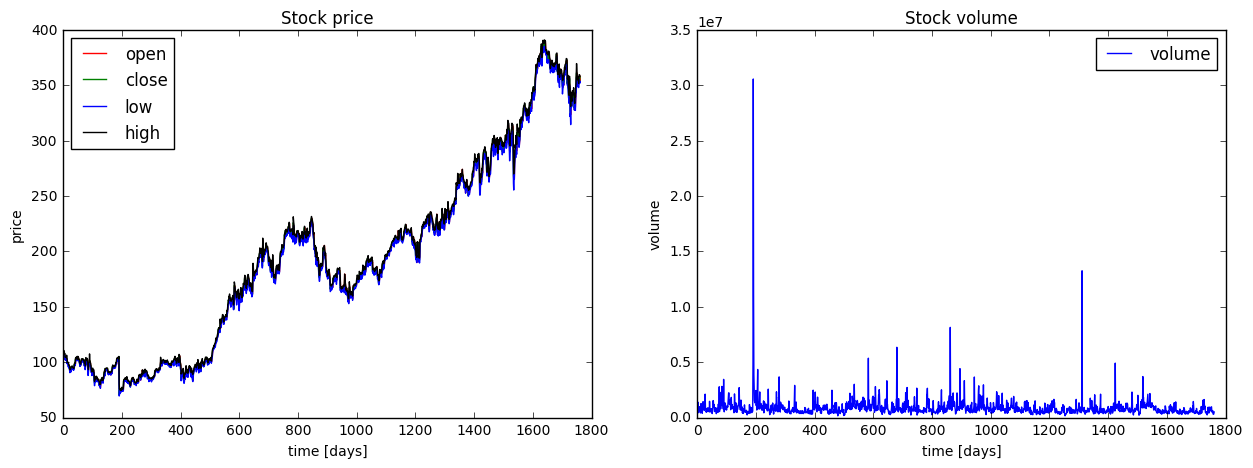

In [11]:
symbol = 'EQIX'

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(df[df.symbol == symbol].open.values, color='red', label='open')
plt.plot(df[df.symbol == symbol].close.values, color='green', label='close')
plt.plot(df[df.symbol == symbol].low.values, color='blue', label='low')
plt.plot(df[df.symbol == symbol].high.values, color='black', label='high')
plt.title('Stock price')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend(loc='best')

plt.subplot(1,2,2)
plt.plot(df[df.symbol == symbol].volume.values, color='blue', label='volume')
plt.title('Stock volume')
plt.xlabel('time [days]')
plt.ylabel('volume')
plt.legend(loc='best')
plt.show()

Manipulate data

In [20]:
#Function for min-max normalization of stock
def normalize_data(df):
    min_max_scaler = sklearn.preprocessing.MinMaxScaler()
    df['open'] = min_max_scaler.fit_transform(df.open.values.reshape(-1,1))
    df['high'] = min_max_scaler.fit_transform(df.high.values.reshape(-1,1))
    df['low'] = min_max_scaler.fit_transform(df.low.values.reshape(-1,1))
    df['close'] = min_max_scaler.fit_transform(df.close.values.reshape(-1,1))
    return df

#Function to create train, validation, test data given stock data and sequence length
def load_data(stock, seq_len):
    raw_data=stock.as_matrix() #Convert to numpy array
    data = []
    
    #Create all possible sequences of length seq_len
    for index in range(len(raw_data) - seq_len):
        data.append(raw_data[index:index + seq_len])
    
    data = np.array(data)
    valid_set_size = int(np.round(validation_size_percentage/100*data.shape[0]))
    test_set_size = int(np.round(test_size_percentage/100*data.shape[0]))
    train_set_size = data.shape[0] - (valid_set_size + test_set_size)
    
    x_train = data[:train_set_size, :-1, :]
    y_train = data[:train_set_size, -1, :]
    
    x_valid = data[train_set_size:train_set_size+valid_set_size, :-1, :]
    y_valid = data[train_set_size:train_set_size+valid_set_size, -1, :]
    
    x_test = data[train_set_size+valid_set_size:, :-1, :]
    y_test = data[train_set_size+valid_set_size:, -1, :]
    
    return [x_train,y_train,x_valid,y_valid,x_test,y_test]


#Choose one stock
df_stock = df[df.symbol == symbol].copy()
df_stock.drop(['symbol'], 1, inplace=True)
df_stock.drop(['volume'], 1, inplace=True)

cols = list(df_stock.columns.values)
print('df_stock.columns.values= ', cols)

#Normalize stock
df_stock_norm = df_stock.copy()
df_stock_norm = normalize_data(df_stock_norm)

print(df_stock_norm['open'].shape)

#Create train, test data
seq_len = 20
x_train, y_train, x_valid, y_valid, x_test, y_test = load_data(df_stock_norm, seq_len)
print('x_train.shape = ', x_train.shape)
print('y_train.shape = ', y_train.shape)
print('x_valid.shape = ', x_valid.shape)
print('y_valid.shape = ', y_valid.shape)
print('x_test.shape = ', x_test.shape)
print('y_test.shape = ', y_test.shape)

df_stock.columns.values=  ['open', 'close', 'low', 'high']
(1762,)
x_train.shape =  (1394, 19, 4)
y_train.shape =  (1394, 4)
x_valid.shape =  (174, 19, 4)
y_valid.shape =  (174, 4)
x_test.shape =  (174, 19, 4)
y_test.shape =  (174, 4)


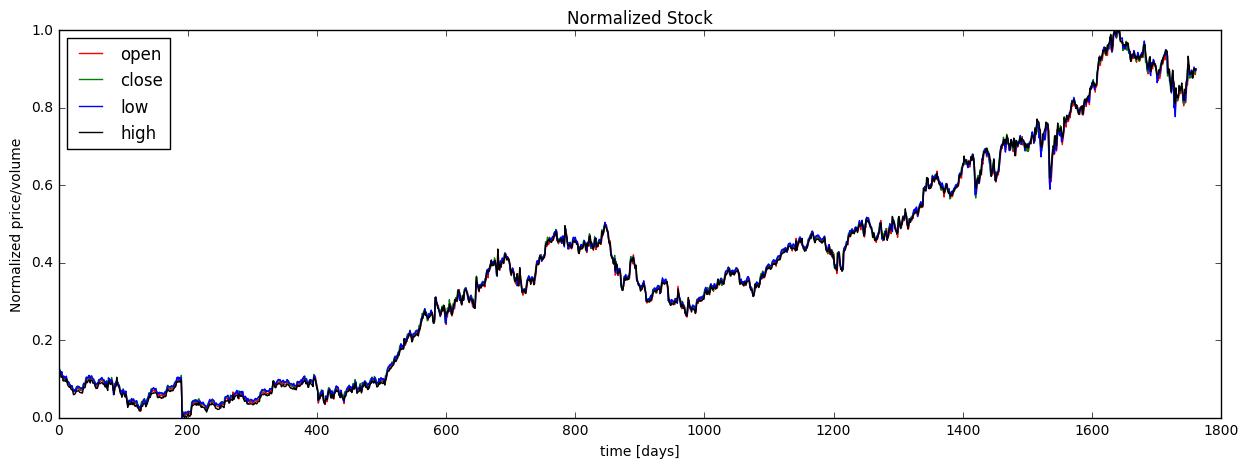

In [22]:
plt.figure(figsize=(15,5))
plt.plot(df_stock_norm.open.values, color='red', label='open')
plt.plot(df_stock_norm.close.values, color='green', label='close')
plt.plot(df_stock_norm.low.values, color='blue', label='low')
plt.plot(df_stock_norm.high.values, color='black', label='high')
plt.title('Normalized Stock')
plt.xlabel('time [days]')
plt.ylabel('Normalized price/volume')
plt.legend(loc='best')
plt.show()

Model and validate data (RNNs with basic LSTM GRU cells)

In [27]:
#Basic cell RNN in tensorflow
index_in_epoch = 0
perm_array = np.arange(x_train.shape[0])
print(perm_array)
np.random.shuffle(perm_array)
print(perm_array)

[   0    1    2 ... 1391 1392 1393]
[ 260  515  744 ... 1136  233  920]


In [28]:
#Function to get the next batch
def get_next_batch(batch_size):
    global index_in_epoch, x_train, perm_array
    start = index_in_epoch
    index_in_epoch += batch_size
    
    if index_in_epoch > x_train.shape[0]:
        np.random.shuffle(perm_array) #Shuffle permutation array
        start = 0 #start next epoch
        index_in_epoch = batch_size
    
    end = index_in_epoch
    return x_train[perm_array[start:end]], y_train[perm_array[start:end]]

#Parameters
n_steps = seq_len - 1
n_inputs = 4
n_neurons = 200
n_outputs = 4
n_layers = 2
learning_rate = 0.001
batch_size = 50
n_epochs = 100
train_set_size = x_train.shape[0]
test_set_size = x_test.shape[0]

tf.reset_default_graph()

x = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_outputs])

#Use Basic RNN cell
layers = [tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu) for layer in range(n_layers)]

# #Use Basic LSTM cell
# layers = [tf.contrib.rnn.LSTMCell(num_units=n_neurons, activation=tf.nn.leaky_relu, use_peepholes=True) for layer in range(n_layers)]

# #Use GRU cell
# layers = [tf.contrib.rnn.GRUCell(num_units=n_neurons, activation=tf.nn.leaky_relu) for layer in range(n_layers)]


multi_layer_cell = tf.contrib.rnn.MultiRNNCell(layers)
rnn_outputs, states = tf.nn.dynamic_rnn(multi_layer_cell, x, dtype=tf.float32)

stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons])
stacked_outputs = tf.layers.dense(stacked_rnn_outputs, n_outputs)
outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])
outputs = outputs[:, n_steps-1, :] #Keep only last output of sequence

loss = tf.reduce_mean(tf.square(outputs - y)) #loss function = mean squared error
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

#Run Graph
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for iteration in range(int(n_epochs*train_set_size/batch_size)):
        x_batch, y_batch = get_next_batch(batch_size) #Fetch the next training batch
        sess.run(training_op, feed_dict={x: x_batch, y: y_batch})
        if iteration % int(5*train_set_size/batch_size) == 0:
            mse_train = loss.eval(feed_dict={x: x_train, y: y_train})
            mse_valid = loss.eval(feed_dict={x: x_valid, y: y_valid})
            print('%.2f epochs: MSE train/valid = %.6f/%.6f' % (iteration*batch_size/train_set_size, mse_train, mse_valid))
    y_train_pred = sess.run(outputs, feed_dict={x: x_train})
    y_valid_pred = sess.run(outputs, feed_dict={x: x_valid})
    y_test_pred = sess.run(outputs, feed_dict={x:x_test})

0.00 epochs: MSE train/valid = 0.072539/0.334842
4.99 epochs: MSE train/valid = 0.000115/0.000428
9.97 epochs: MSE train/valid = 0.000099/0.000343
14.96 epochs: MSE train/valid = 0.000092/0.000319
19.94 epochs: MSE train/valid = 0.000117/0.000465
24.93 epochs: MSE train/valid = 0.000128/0.000385
29.91 epochs: MSE train/valid = 0.000067/0.000200
34.90 epochs: MSE train/valid = 0.000074/0.000227
39.89 epochs: MSE train/valid = 0.000074/0.000214
44.87 epochs: MSE train/valid = 0.000061/0.000211
49.86 epochs: MSE train/valid = 0.000075/0.000226
54.84 epochs: MSE train/valid = 0.000066/0.000232
59.83 epochs: MSE train/valid = 0.000068/0.000216
64.81 epochs: MSE train/valid = 0.000114/0.000539
69.80 epochs: MSE train/valid = 0.000059/0.000187
74.78 epochs: MSE train/valid = 0.000082/0.000283
79.77 epochs: MSE train/valid = 0.000061/0.000193
84.76 epochs: MSE train/valid = 0.000065/0.000197
89.74 epochs: MSE train/valid = 0.000058/0.000178
94.73 epochs: MSE train/valid = 0.000058/0.000191
99.

In [29]:
y_train.shape

(1394, 4)

1394
174
174
1742


1394
174
174
1742


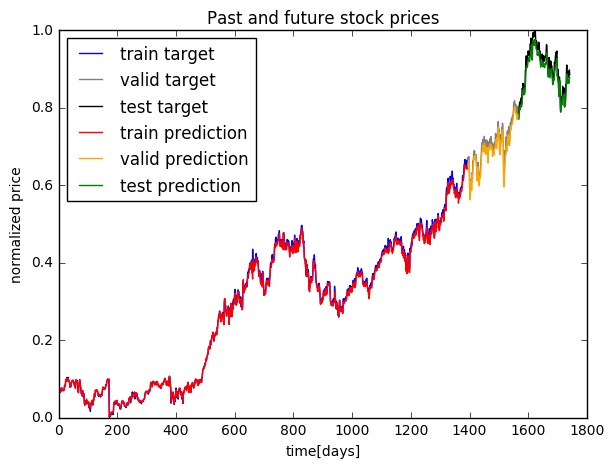

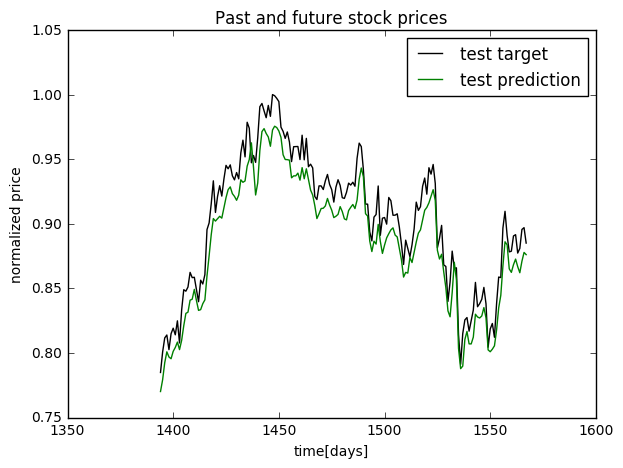

In [53]:
ft = 0 # 0 = open, 1 = close, 2 = highest, 3 = lowest
print(y_train.shape[0])
print(y_valid.shape[0])
print(y_test.shape[0])
print(y_train.shape[0]+y_valid.shape[0]+y_test.shape[0])
print('\n')
print(y_train_pred.shape[0])
print(y_valid_pred.shape[0])
print(y_test_pred.shape[0])
print(y_train_pred.shape[0]+y_valid_pred.shape[0]+y_test_pred.shape[0])


# print(y_train[:, ft])

#Show predictions
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)

plt.plot(np.arange(y_train.shape[0]), y_train[:, ft], color='blue', label='train target')
plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_valid.shape[0]), y_valid[:, ft], color='gray', label='valid target')
plt.plot(np.arange(y_train.shape[0]+y_valid.shape[0], y_train.shape[0]+y_valid.shape[0]+y_test.shape[0]), y_test[:, ft], color='black', label='test target')

plt.plot(np.arange(y_train_pred.shape[0]), y_train_pred[:, ft], color='red', label='train prediction')
plt.plot(np.arange(y_train_pred.shape[0], y_train_pred.shape[0]+y_valid_pred.shape[0]), y_valid_pred[:, ft], color='orange', label='valid prediction')
plt.plot(np.arange(y_train_pred.shape[0]+y_valid_pred.shape[0], y_train_pred.shape[0]+y_valid_pred.shape[0]+y_test_pred.shape[0]), y_test_pred[:, ft], color='green', label='test prediction')

plt.title('Past and future stock prices')
plt.xlabel('time[days]')
plt.ylabel('normalized price')
plt.legend(loc='best')
plt.show()

plt.figure(figsize=(15,5))
plt.subplot(1,2,2)

plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_test.shape[0]), y_test[:,ft], color='black', label='test target')
plt.plot(np.arange(y_train_pred.shape[0], y_train_pred.shape[0]+y_test_pred.shape[0]), y_test_pred[:,ft], color='green', label='test prediction')


plt.title('Past and future stock prices')
plt.xlabel('time[days]')
plt.ylabel('normalized price')
plt.legend(loc='best')
plt.show()